In [24]:
import multiprocessing as mp
import os 
from __future__ import print_function
import pybobyqa
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import glob
import json
import pybt
from pybt.tools.parsers import read_twiss_file
from pybt.myjson.encoder import myJSONDecoder
from os import walk
import matplotlib.dates as mdates
import pickle
from datetime import datetime
from scipy.optimize import curve_fit
from skimage import filters
from scipy import integrate
import logging
import requests

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [9]:
import pickle

with open('new_df.pickle', 'rb') as f:
    new_df = pickle.load(f)

with open('H_sigma_madx_list.pickle', 'rb') as f:
    H_sigma_madx_list = pickle.load(f)

with open('V_sigma_madx_list.pickle', 'rb') as f:
    V_sigma_madx_list = pickle.load(f)

E_cin_per_nucleon = 2.0

# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

betx0 = 6.67479971e+01
bety0 = 3.76412474e+00
alfx0 = -1.62722259e+01
alfy0 = 7.03346313e-01
exn = 2.28304416e-05
eyn = 8.63495536e-06

dx0 = 0.08552983
dpx0 = 0.01723517
dy0 = -0.0026243
dpy0 = -0.00475684
sige = 0.0045



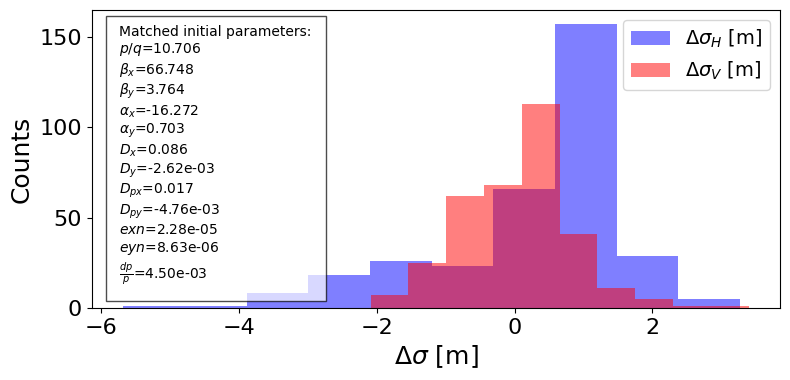

In [30]:
fig, ax = plt.subplots(figsize=(8,3.9),tight_layout=True)

ax.hist(new_df.sigH-H_sigma_madx_list, label=r"$\Delta\sigma_{H}$ [m]", color="b", alpha=0.5, bins=10)
ax.hist(new_df.sigV-V_sigma_madx_list, label=r"$\Delta\sigma_{V}$ [m]", color="r", alpha=0.5, bins=10)

ax.legend(loc = "upper right")

# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    rf'$p/q$={p/charge:.3f}',
    rf'$\beta_{{x}}$={betx0:.3f}',
    rf'$\beta_{{y}}$={bety0:.3f}',
    rf'$\alpha_{{x}}$={alfx0:.3f}',
    rf'$\alpha_{{y}}$={alfy0:.3f}',
    rf'$D_{{x}}$={dx0:.3f}',
    rf'$D_{{y}}$={dy0:.2e}',
    rf'$D_{{px}}$={dpx0:.3f}',
    rf'$D_{{py}}$={dpy0:.2e}',
    rf'$exn$={exn:.2e}',
    rf'$eyn$={eyn:.2e}',
    rf'$\frac{{dp}}{{p}}$={sige:.2e}',
))


props = dict(boxstyle='square', facecolor='white', alpha=0.7, pad=1)

# place a text box in upper left in axes coords
ax.text(0.04, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax.set_xlabel(rf"$\Delta\sigma$ [m]")
ax.set_ylabel("Counts")

# ax.set_title("Difference between measurements and simulations")
plt.savefig("beam_size_diff.png", dpi=300, bbox_inches="tight", transparent=True)